# 第２章 確率分布と統計モデルの最尤推定

In [28]:
from pathlib import Path
from typing import cast

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyreadr
import scipy as sp
from matplotlib import ticker

plt.rcParams["font.size"] = 15

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

plt.rcParams["legend.fancybox"] = False

japanize_matplotlib.japanize()

PATH_DATA = Path("data/data.csv")

## データの取り込み
この章で用いる架空データ

In [29]:
df_data = cast(pd.DataFrame, pyreadr.read_r("data/data.RData")["data"]).astype({"data": int})

## 2.1 例題：種子数の統計モデリング

データの内容

In [30]:
df_data.to_numpy().flatten()

array([2, 2, 4, 6, 4, 5, 2, 3, 1, 2, 0, 4, 3, 3, 3, 3, 4, 2, 7, 2, 4, 3,
       3, 3, 4, 3, 7, 5, 3, 1, 7, 6, 4, 6, 5, 2, 4, 7, 2, 2, 6, 2, 4, 5,
       4, 5, 1, 3, 2, 3])

データの個数

In [31]:
df_data.count()

data    50
dtype: int64

データの各種統計量

In [32]:
df_data.describe()

,data
count,50.00000
mean,3.56000
std,1.72804
min,0.00000
25%,2.00000
50%,3.00000
75%,4.75000
max,7.00000


データの度数分布

In [33]:
df_data["data"].value_counts().sort_index(axis=0)

data
0     1
1     3
2    11
3    12
4    10
5     5
6     4
7     4
Name: count, dtype: int64

#### 図2.2 観測データのヒストグラム

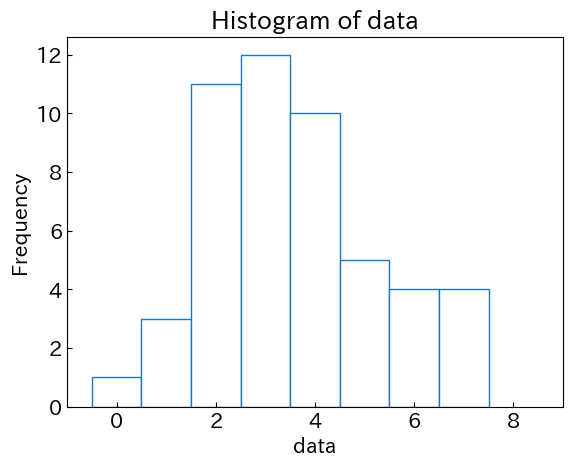

In [34]:
def plot_fig_2_2(df_data: pd.DataFrame) -> None:
    unique = df_data["data"].unique()

    ax: plt.Axes
    fig, ax = plt.subplots()

    # plot
    ax.hist(df_data, bins=range(len(unique) + 1), align="left", color="white", ec="C0", width=1)

    # title and labels
    ax.set_title("Histogram of data")
    ax.set_xlabel("data")
    ax.set_ylabel("Frequency")

    # ticks
    ax.set_xticks(np.linspace(0, 8, 5))
    ax.set_yticks(np.linspace(0, 12, 7))

    # range
    ax.set_xlim(-1, 9)

    # show
    plt.show()


plot_fig_2_2(df_data)

データの標本分散

In [35]:
df_data.var()

data    2.986122
dtype: float64

データの標本標準偏差

In [36]:
df_data.std()

data    1.72804
dtype: float64

## 2.2 データと確率分布の対応関係を眺めてみる

ポアソン分布の確率分布

In [37]:
def df_2_3(df_data: pd.DataFrame) -> pd.DataFrame:
    y = np.linspace(0, 9, 10, dtype=int)

    return pd.DataFrame({"y": y, "prob": sp.stats.poisson.pmf(y, df_data.mean())})


df_2_3(df_data)

,y,prob
0,0,0.028439
1,1,0.101242
2,2,0.180211
3,3,0.213851
4,4,0.190327
5,5,0.135513
6,6,0.080404
7,7,0.040891
8,8,0.018197
9,9,0.007198


#### 図2.4 平均$\lambda$=3.56のポアソン分布

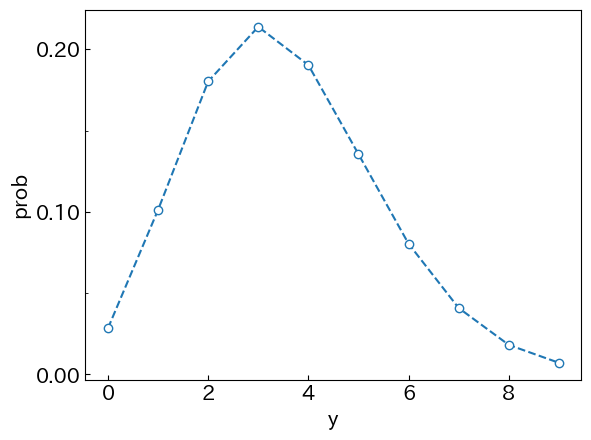

In [38]:
def plot_fig_2_4(df_data: pd.DataFrame) -> None:
    # data
    y = np.linspace(0, 9, 10, dtype=int)
    prob = sp.stats.poisson.pmf(y, df_data.mean())

    # fig and ax
    ax: plt.Axes
    fig, ax = plt.subplots()

    # plot
    ax.plot(y, prob, markerfacecolor="white", marker="o", linestyle="--")

    # title and labels
    ax.set_xlabel("y")
    ax.set_ylabel("prob")

    # ticks
    ax.set_yticks(np.linspace(0, 0.2, 3))
    ax.set_yticks(np.linspace(0, 0.2, 5), minor=True)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    plt.show()


plot_fig_2_4(df_data)

#### 図2.5 観測データと確率分布の対応

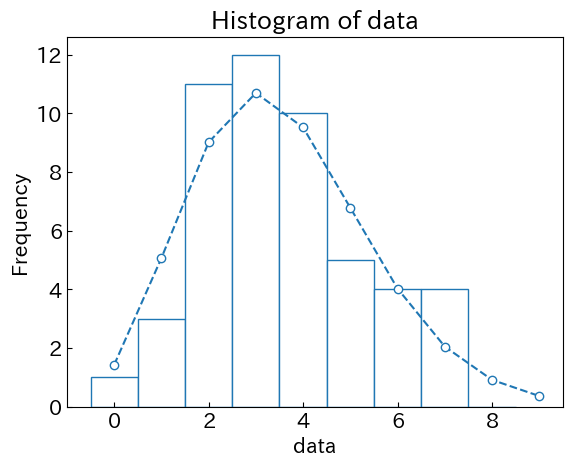

In [39]:
def plot_fig_2_5(df_data: pd.DataFrame) -> None:
    # data
    y = np.linspace(0, 9, 10, dtype=int)
    prob = sp.stats.poisson.pmf(y, df_data.mean())

    # fig and ax
    ax: plt.Axes
    fig, ax = plt.subplots()

    # plot
    ax.hist(df_data, bins=range(10), align="left", color="white", ec="C0", width=1)
    ax.plot(y, prob * 50, markerfacecolor="white", marker="o", linestyle="--")

    # title and labels
    ax.set_title("Histogram of data")
    ax.set_xlabel("data")
    ax.set_ylabel("Frequency")

    # ticks
    ax.set_xticks(np.linspace(0, 8, 5))
    ax.set_yticks(np.linspace(0, 12, 7))

    # range
    ax.set_xlim(-1, 9.5)

    plt.show()


plot_fig_2_5(df_data)

## 2.3 ポアソン分布とは何か

#### 図2.6 様々な平均($\lambda$)のポアソン分布

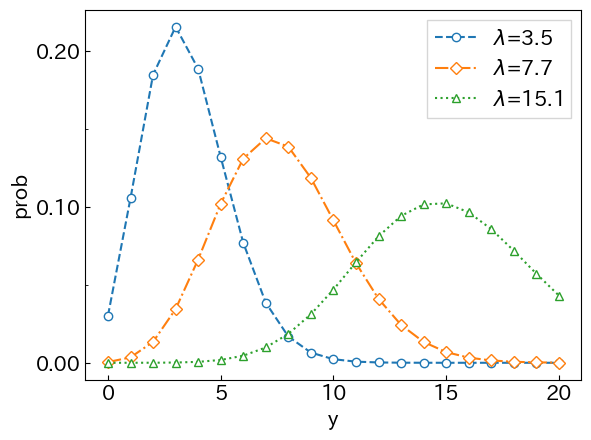

In [40]:
def plot_fig_2_6(df_data: pd.DataFrame) -> None:
    # data
    y = np.linspace(0, 20, 21, dtype=int)
    lambda_list = [3.5, 7.7, 15.1]

    # fig and ax
    ax: plt.Axes
    fig, ax = plt.subplots()

    # plot
    for i, lambda_ in enumerate(lambda_list):
        prob = sp.stats.poisson.pmf(y, lambda_)
        ax.plot(
            y,
            prob,
            label=f"$\lambda$={lambda_}",
            markerfacecolor="white",
            marker="oD^"[i],
            linestyle=["--", "-.", ":"][i],
        )

    # title and labels
    ax.set_xlabel("y")
    ax.set_ylabel("prob")

    # ticks
    ax.set_xticks(np.linspace(0, 20, 5))

    ax.set_yticks(np.linspace(0, 0.2, 3))
    ax.set_yticks(np.linspace(0, 0.2, 5), minor=True)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    # legend
    ax.legend()

    plt.show()


plot_fig_2_6(df_data)

## 2.4 ポアソン分布のパラメータの最尤推定

#### 図2.7 平均$\lambda$を変化させたポアソン分布と観測データの対数尤度

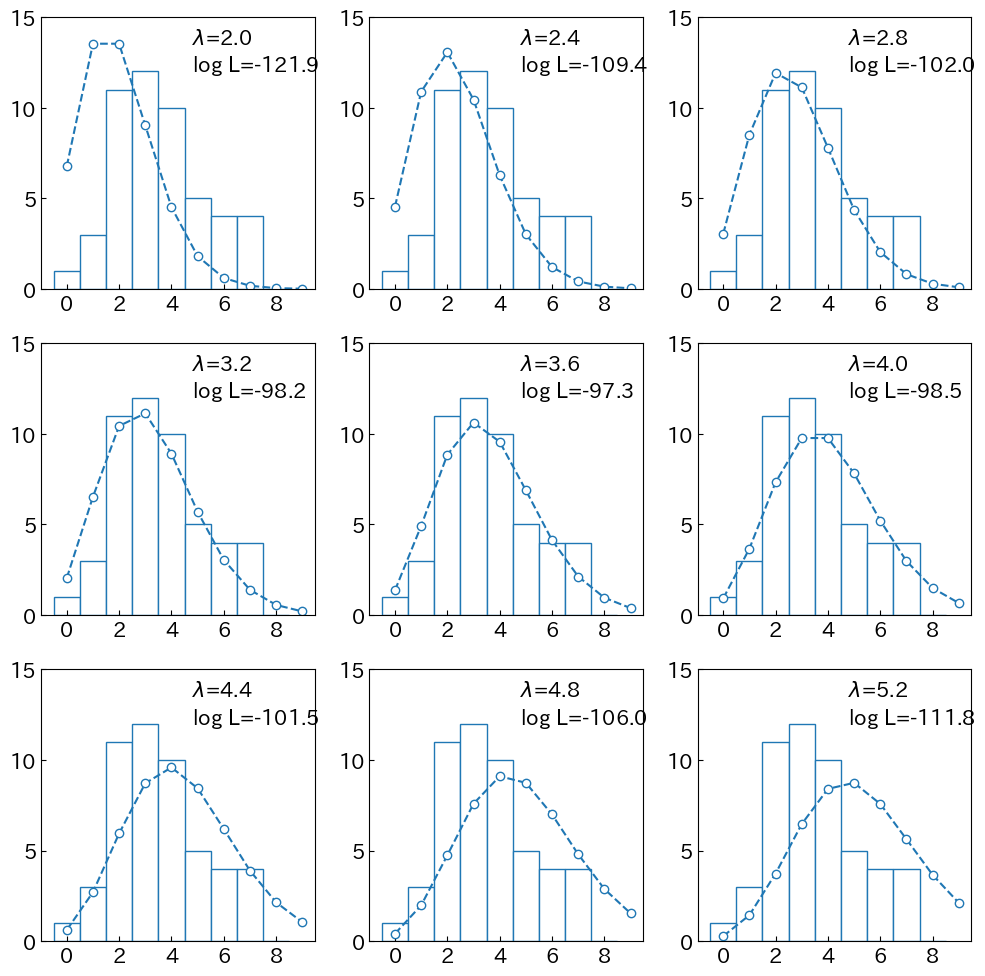

In [41]:
def plot_fig_2_7(df_data: pd.DataFrame) -> None:
    # data
    y = np.linspace(0, 9, 10, dtype=int)
    lambda_list = np.linspace(2.0, 5.2, 9)

    # fig and ax
    fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))

    # plot
    for i, lambda_ in enumerate(lambda_list):
        prob = sp.stats.poisson.pmf(y, lambda_)
        likelihood = sp.stats.poisson.pmf(df_data, lambda_).prod()

        ax: plt.Axes
        ax = axes.flatten()[i]
        ax.hist(df_data, bins=range(10), align="left", color="white", ec="C0", width=1)
        ax.plot(y, prob * 50, label=f"$\lambda$={lambda_:.1f}", markerfacecolor="white", marker="o", linestyle="--")
        ax.text(0.55, 0.9, f"$\lambda$={lambda_:.1f}", transform=ax.transAxes)
        ax.text(0.55, 0.8, f"log $\\rm L$={np.log(likelihood):.1f}", transform=ax.transAxes)

        # ticks
        ax.set_xticks(np.linspace(0, 8, 5))
        ax.set_yticks(np.linspace(0, 15, 4))

    plt.show()


plot_fig_2_7(df_data)

#### 図2.8 観測データのもとでの$\lambda$と対数尤度との関係

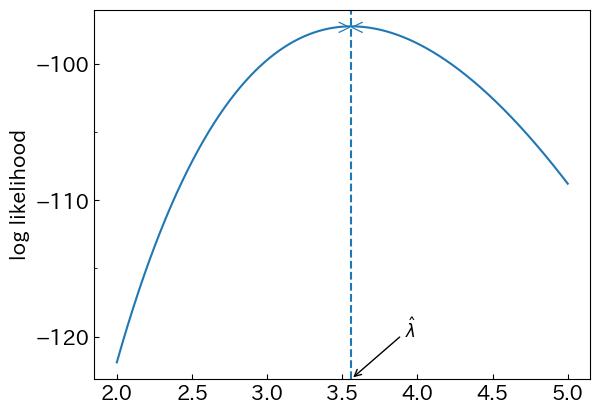

In [42]:
def plot_fig_2_8(df_data: pd.DataFrame) -> None:
    # data
    lambda_array = np.linspace(2.0, 5.0, 1000)

    likelihood_array = np.array([sp.stats.poisson.pmf(df_data, lambda_).prod() for lambda_ in lambda_array])
    lambda_hat = lambda_array[np.argmax(likelihood_array)]
    likelihood_max = np.max(likelihood_array)

    # fig and ax
    ax: plt.Axes
    fig, ax = plt.subplots()

    # plot
    ax.plot(lambda_array, np.log(likelihood_array))
    xlims, ylims = ax.get_xlim(), ax.get_ylim()

    ax.vlines(lambda_hat, *ylims, linestyles="--")

    diff = 0.001
    ax.text(
        lambda_hat * (1 - diff),
        np.log(likelihood_max) * (1 + diff),
        "><",
        horizontalalignment="center",
        verticalalignment="center",
        fontdict={"color": "C0", "weight": "bold"},
    )
    ax.annotate(
        "$\hat{\lambda}$",
        xy=(lambda_hat, ylims[0]),
        xytext=(lambda_hat * 1.1, ylims[0] * 0.975),
        fontsize=12,
        arrowprops=dict(arrowstyle="->", color="black"),
    )

    # title and labels
    ax.set_ylabel("log likelihood")

    # ticks
    ax.set_yticks(np.linspace(-120, -100, 3))
    ax.set_yticks(np.linspace(-120, -100, 5), minor=True)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    # range
    ax.set_xlim(*xlims)
    ax.set_ylim(*ylims)

    plt.show()


plot_fig_2_8(df_data)

### 2.4.1 擬似乱数と最尤推定値のばらつき

#### 図2.9 ポアソン分布の最尤推定値$\hat{\lambda}$のばらつき

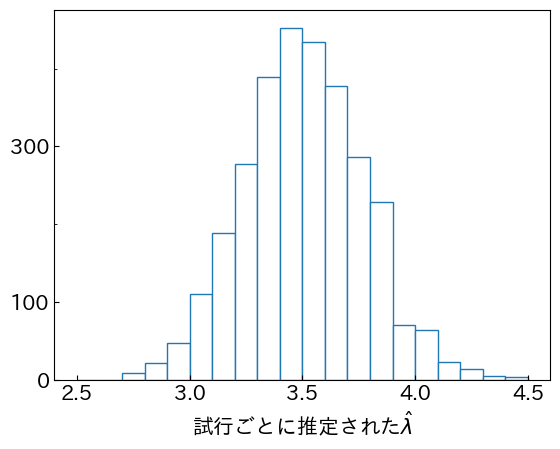

In [43]:
def plot_fig_2_9() -> None:
    # data
    lambda_ = 3.5
    n_data = 50
    n_trial = 3000
    lambda_hat_array = np.random.poisson(lambda_, (n_trial, n_data)).mean(axis=1)

    # fig and ax
    ax: plt.Axes
    fig, ax = plt.subplots()

    # plot
    ax.hist(lambda_hat_array, range=(2.5, 4.5), bins=20, color="white", ec="C0", width=0.1)

    # title and labels
    ax.set_xlabel("試行ごとに推定された$\hat{\lambda}$")

    # ticks
    ax.set_xticks(np.linspace(2.5, 4.5, 5))

    ax.set_yticks([0, 100, 300])
    ax.set_yticks([0, 100, 200, 300, 400], minor=True)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    plt.show()


plot_fig_2_9()

## 2.6 確率分布の選び方

#### ポアソン分布

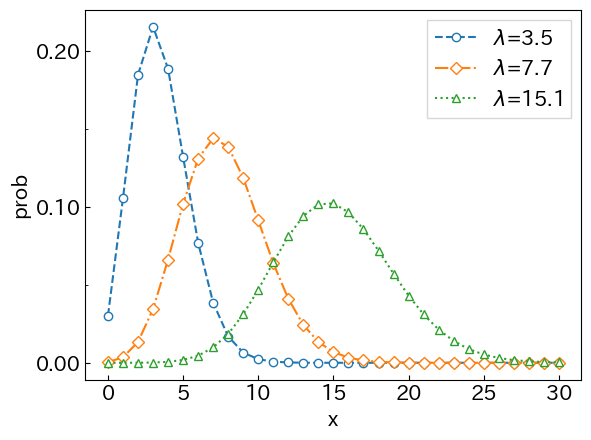

In [44]:
def plot_poisson_pdf() -> None:
    # data
    x_min, x_max = 0, 30
    x = np.linspace(x_min, x_max, x_max + 1, dtype=int)
    lambda_list = [3.5, 7.7, 15.1]

    # fig and ax
    ax: plt.Axes
    fig, ax = plt.subplots()

    # plot
    for i, lambda_ in enumerate(lambda_list):
        prob = sp.stats.poisson.pmf(x, lambda_)
        ax.plot(
            x,
            prob,
            label=f"$\lambda$={lambda_}",
            markerfacecolor="white",
            marker="oD^"[i],
            linestyle=["--", "-.", ":"][i],
        )

    # title and labels
    ax.set_xlabel("x")
    ax.set_ylabel("prob")

    # ticks
    ax.set_xticks(np.linspace(0, x_max, 7))

    ax.set_yticks(np.linspace(0, 0.2, 3))
    ax.set_yticks(np.linspace(0, 0.2, 5), minor=True)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    # legend
    ax.legend()

    plt.show()


plot_poisson_pdf()

#### 二項分布

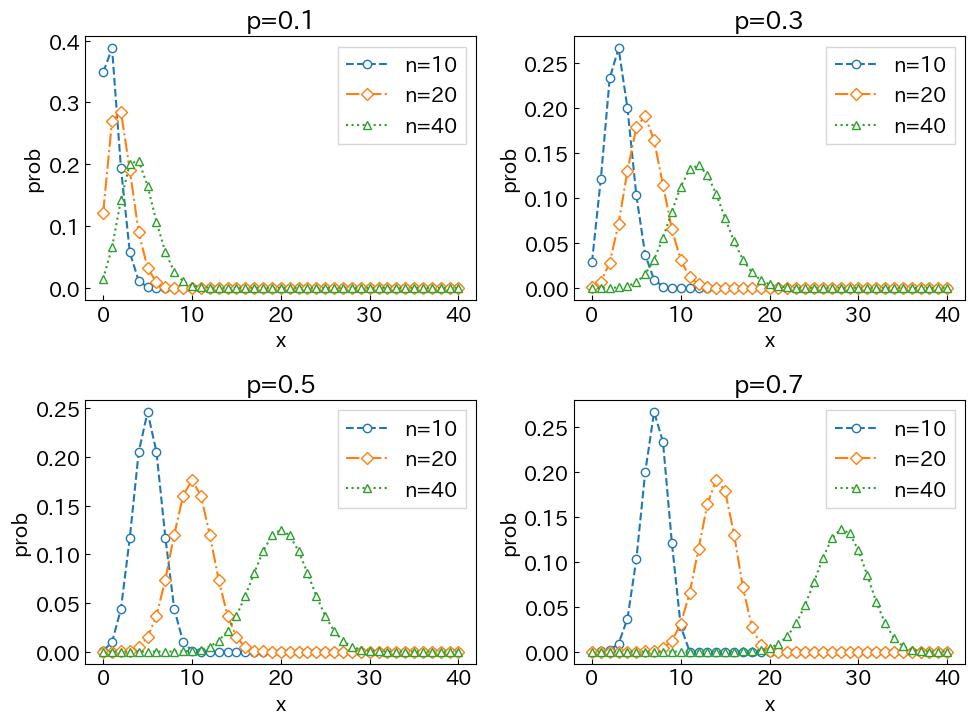

In [45]:
def plot_binominal_pdf() -> None:
    # data
    x_min, x_max = 0, 40
    x = np.linspace(x_min, x_max, x_max + 1, dtype=int)
    n_list = [10, 20, 40]
    p_list = [0.1, 0.3, 0.5, 0.7]

    # fig and ax
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7.5))

    # plot
    for i, p in enumerate(p_list):
        ax: plt.Axes
        ax = axes.flatten()[i]
        for j, n in enumerate(n_list):
            prob = sp.stats.binom.pmf(x, n, p)
            ax.plot(
                x,
                prob,
                label=f"n={n}",
                markerfacecolor="white",
                linestyle=["--", "-.", ":", "-"][j],
                marker="oD^"[j],
            )

        # title and labels
        ax.set_title(f"p={p}")
        ax.set_xlabel("x")
        ax.set_ylabel("prob")

        # legend
        ax.legend()

    ax = axes.flatten()[-1]

    fig.tight_layout()

    plt.show()


plot_binominal_pdf()

#### 正規分布

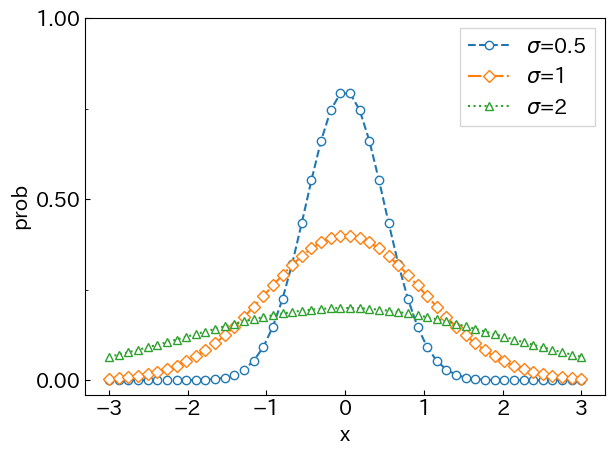

In [46]:
def plot_gaussian_pdf() -> None:
    # data
    x_min, x_max = -3, 3
    x = np.linspace(x_min, x_max, 50)
    mu = 0
    sigma_list = [0.5, 1, 2]

    # fig and ax
    ax: plt.Axes
    fig, ax = plt.subplots()

    # plot
    for j, sigma in enumerate(sigma_list):
        prob = sp.stats.norm.pdf(x, mu, sigma)
        ax.plot(
            x,
            prob,
            label=f"$\sigma$={sigma}",
            linestyle=["--", "-.", ":"][j],
            markerfacecolor="white",
            marker="oD^"[j],
        )

    # title and labels
    ax.set_xlabel("x")
    ax.set_ylabel("prob")

    # ticks
    ax.set_xticks(np.linspace(x_min, x_max, 7))

    ax.set_yticks(np.linspace(0, 1, 3))
    ax.set_yticks(np.linspace(0, 1, 5), minor=True)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    # legend
    ax.legend()

    fig.tight_layout()

    plt.show()


plot_gaussian_pdf()

#### ガンマ分布

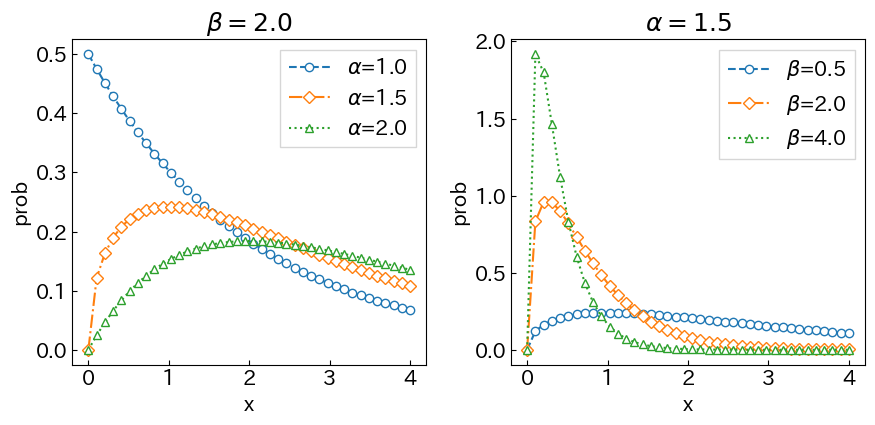

In [47]:
def plot_gamma_pdf() -> None:
    # data
    x_min, x_max = 0, 4
    x = np.linspace(x_min, x_max, 40)
    alpha_list = [1.0, 1.5, 2.0]
    beta_list = [0.5, 2.0, 4.0]

    # fig and ax
    fig, axes = plt.subplots(ncols=2, figsize=(9, 4.5))

    # plot
    ax_fix_beta: plt.Axes
    ax_fix_beta = axes[0]
    beta = beta_list[1]

    for i, alpha in enumerate(alpha_list):
        prob = sp.stats.gamma.pdf(x, alpha, scale=beta)
        ax_fix_beta.plot(
            x,
            prob,
            label=f"$\\alpha$={alpha}",
            linestyle=["--", "-.", ":"][i],
            markerfacecolor="white",
            marker="oD^"[i],
        )

    # title and labels
    ax_fix_beta.set_title(f"$\\beta={beta}$")
    ax_fix_beta.set_xlabel("x")
    ax_fix_beta.set_ylabel("prob")

    # legend
    ax_fix_beta.legend()

    ax_fix_alpha: plt.Axes
    ax_fix_alpha = axes[1]
    alpha = alpha_list[1]

    for i, beta in enumerate(beta_list):
        prob = sp.stats.gamma.pdf(x, alpha, scale=1 / beta)
        ax_fix_alpha.plot(
            x,
            prob,
            label=f"$\\beta$={beta}",
            linestyle=["--", "-.", ":"][i],
            markerfacecolor="white",
            marker="oD^"[i],
        )

    # title and labels
    ax_fix_alpha.set_title(f"$\\alpha={alpha}$")
    ax_fix_alpha.set_xlabel("x")
    ax_fix_alpha.set_ylabel("prob")

    # legend
    ax_fix_alpha.legend()

    fig.tight_layout()

    plt.show()


plot_gamma_pdf()